In [1]:
import oursin as urchin
import pandas as pd
urchin.setup()

(URN) connected to server
Login sent with ID: c33316b8, copy this ID into the renderer to connect.


In [2]:
#urchin.ccf25.set_reference_coord([5200,5700,333])
urchin.ccf25.load()


In [3]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color('#000000')
urchin.ccf25.grey.set_alpha(0.3)

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


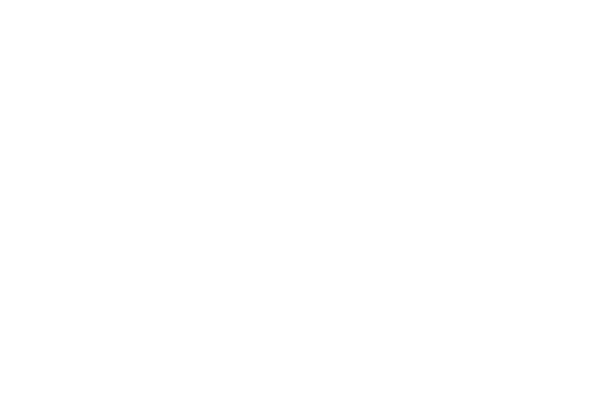

In [4]:
urchin.camera.main.set_zoom(7)
await urchin.camera.main.screenshot(size=[600,400])

In [5]:

probe_data = pd.read_csv("D:/Florian_paper/Florian/Aligned_Data/Analysable_data/Probe_pos.csv")
print(probe_data)
print(len(probe_data))

  dye session  depth  session.1    ml   ml2    ap   ap2    dv   dv2  phi  \
0   I    M7_1   3380          1   950  4750  1150  4050  3000  3333    0   
1   O    M7_2   3310          1   800  4900  1100  4100  3001  3334    0   
2   I    M8_1   3000          2   950  4750  1000  4200  3002  3335    0   
3   O    M8_2   2800          2  1100  4600  1050  4150  3003  3336    0   
4   D    M8_3   2700          2  1000  4700  1100  4100  3004  3337    0   
5   I    M9_1   2760          3   900  4800   900  4300  3005  3338    0   
6   O    M9_2   2910          3   800  4900   820  4380  3006  3339    0   
7   D    M9_3   3000          3   920  4780   900  4300  3007  3340    0   

   theta    color  
0     88  #bc0e0e  
1     90  #ffcd10  
2     90  #81ba96  
3     90  #1d8097  
4     90  #ffd966  
5     83  #0d93a1  
6     83  #0d93a1  
7     83  #5e2c47  
8


(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete
(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


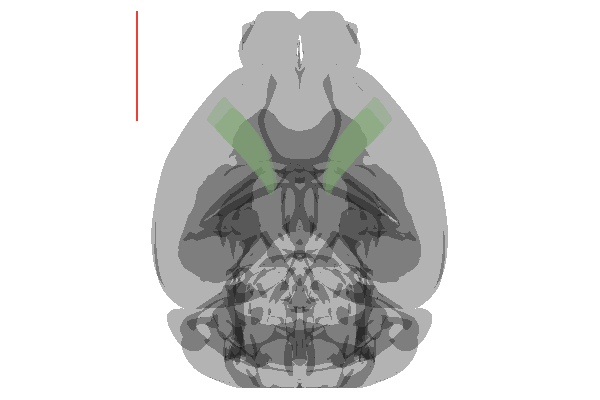

In [6]:
probes = urchin.probes.create(len(probe_data))
urchin.probes.set_colors(probes,['#eb4034']*len(probes))
await urchin.camera.main.screenshot(size=[600,400])


urchin.ccf25.set_visibilities(urchin.ccf25.get_areas(['MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b']), True)
urchin.ccf25.set_colors(urchin.ccf25.get_areas(['MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b']), ['97BA8C','8BB380','7FAB73','73A366','69995C','869FAC','7995A4','6D8C9C','638292','5B7786'])
urchin.ccf25.set_materials(urchin.ccf25.get_areas(['MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b']), ['transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit','transparent-unlit'])
urchin.ccf25.set_alphas(urchin.ccf25.get_areas(['MOp1', 'MOp2/3', 'MOp5', 'MOp6a', 'MOp6b', 'MOs1', 'MOs2/3', 'MOs5', 'MOs6a', 'MOs6b']),[0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4])
await urchin.camera.main.screenshot(size=[600,400])


[[4050, 4750, 3333], [4100, 4900, 3334], [4200, 4750, 3335], [4150, 4600, 3336], [4100, 4700, 3337], [4300, 4800, 3338], [4380, 4900, 3339], [4300, 4780, 3340]]
(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


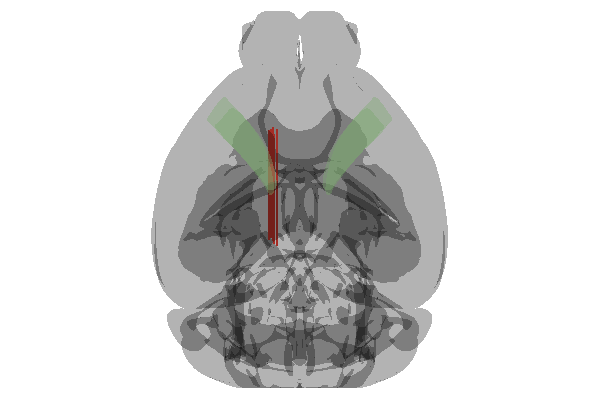

In [7]:
positions_list = []

for i, row in probe_data.iterrows():
    position = [row['ap2'], row['ml2'], row['dv2']]
    positions_list.append(position)
print(positions_list)
urchin.probes.set_positions(probes, positions_list) #setting the positions within the renderer
await urchin.camera.main.screenshot(size=[600,400])

(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


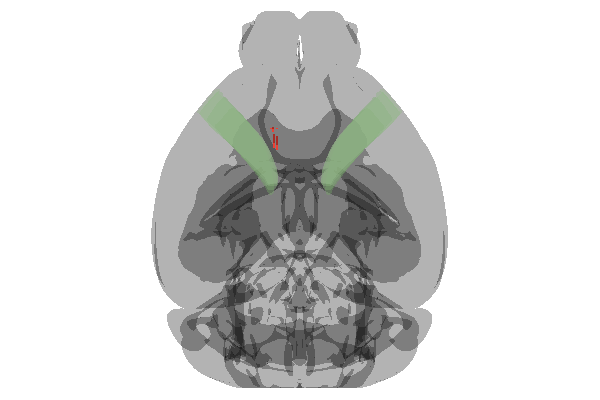

In [8]:
angles_list = []

for i, row in probe_data.iterrows():
    angle = [row['phi'], row['theta'], 0] # roll is set to 0
    angles_list.append(angle)

urchin.probes.set_angles(probes, angles_list) #setting the positions within the renderer
await urchin.camera.main.screenshot(size=[600,400])

In [9]:

s_cam = urchin.camera.Camera()
h_cam = urchin.camera.Camera()
c_cam = urchin.camera.Camera()
s_cam.set_rotation([0,90,-90])
s_cam.set_zoom(7)

h_cam.set_rotation([0,-10,90])
h_cam.set_zoom(7)

c_cam.set_rotation([90,0,180])
c_cam.set_zoom(7)

urchin.camera.main.set_rotation('angled')
urchin.camera.main.set_mode('perspective')
urchin.camera.main.set_zoom(60)
s_png = await s_cam.screenshot(size=[300,300])
h_png = await h_cam.screenshot(size=[300,300])
c_png = await c_cam.screenshot(size=[300,300])

angled_png = await urchin.camera.main.screenshot(size=[600,900])

(Camera receive) Camera Camera2 received an image
(Camera receive) Camera2 complete
(Camera receive) Camera Camera3 received an image
(Camera receive) Camera3 complete
(Camera receive) Camera Camera4 received an image
(Camera receive) Camera4 complete
(Camera receive) Camera CameraMain received an image
(Camera receive) CameraMain complete


In [10]:
from PIL import Image

grid_image = Image.new('RGBA', (900, 900))

grid_image.paste(s_png, (0, 0))
grid_image.paste(h_png, (0, 300))
grid_image.paste(c_png, (0, 600))
grid_image.paste(angled_png, (300, 0))

grid_image
grid_image.save("C:/Users/Freitag/Desktop/probe_pos.png")